pip install numpy
pip install pandas
pip install seaborn
pip install mat plot lib
pip install scikit-learn

# Regresyon Nedir?

Regresyon, <span style='color:red'>bağımlı değişken (hedef-sonuç)</span> ile bir veya daha fazla <span style='color:red'>bağımsız değişken (özellik-girdi) </span> arasındaki ilişkiyi modelleyen istatistiksel bir yöntemdir. Temel amacı, verilen girdi değerlerine dayanarak sürekli bir çıktı değeri tahmin etmektir.

# Temel Regresyon Algoritmaları

## 1. Lineer (Doğrusal) Regresyon - (Linear Regression)

**Lineer regresyon,** istatistikte ve makine öğrenmesinde kullanılan en temel ve yaygın regresyon (doğrusal ilişki tahmini) yöntemidir. Amaç, bir bağımlı değişken (sonuç) ile bir veya daha fazla bağımsız değişken (girdi) arasındaki ilişkiyi **doğrusal bir denklemle** modellemektir.

**Lineer regresyon,** bağımlı değikenin (Y), bağımsız değişkenin (X) ile doğrusal bir ilişki içinde olduğunu varsayar. Bu ilişki şu şekilde ifade edilir:

$$ Y = a + bX + \epsilon $$

* $Y$ : Tahmin edilmek istenen değer (bağımlı değişken)
* $X$ : Girdi (bağımsız değişken)
* $a$ : Sabit terim (Y-intercept)
* $b$ : Eğim katsayısı (slope - X'in Y üzerindeki etkisi) (Regresyon Çizgi Eğrisi)
* $\epsilon$ : Hata payı (Bağımlı değişkenin belli bir hata içerdiği varsayılır. Bağımsız değişkende hata yoktur.)


Peki bu $a$ ve $b$ değerleri nasıl hesaplanır?

$$ a = \frac{\sum y \sum x^2 - \sum x \sum xy} {n(\sum x^2) - (\sum x)^2} $$
<br></br>
$$ b = \frac {n\sum xy - (\sum x) (\sum y)} {n \sum x^2 - (\sum x)^2}$$

**Ne İşe Yarar?**

* Veriler arasındaki ilişkiyi analiz eder.
* Geleceğe dönük tahminler yapar.
* Özellikler arası bağıntıyı ölçer.

**Avantajları:**

* Kolay anlaşılır ve yorumlanabilir.
* Hesaplama açısından verimli.
* Hızlı uygulanabilir.

**Sınırlamaları:**
* Sadece doğrusal ilişkileri modelleyebilir.
* Aykırı değerlerden etkilenebilir.
* Değişkenler arasında çoklu bağlantılar (multicollinearity) varsa sonuçlar bozulabilir.

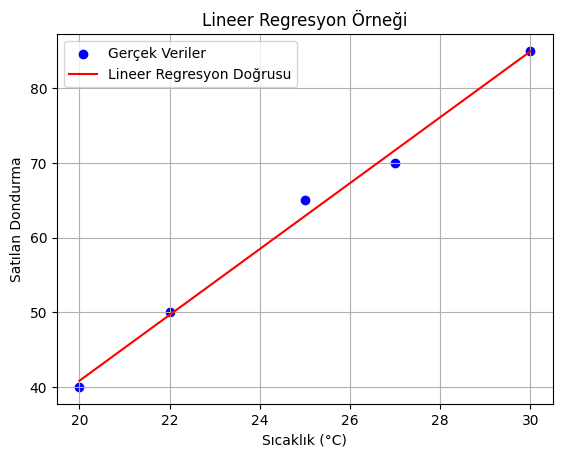

In [11]:
# Örnek

# Bir dondurmacı, günlük sıcaklık ile satılan dondurma sayısı arasında bir ilişki olup olmadığını görmek istiyor ve elimizde şöyle veriler alalım.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verilerimiz
X = np.array([[20], [22], [25], [27], [30]]) # Sıcaklık
y = np.array([40, 50, 65, 70, 85]) # Satış

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.linspace(20, 30, 100).reshape(-1,1) # 20'den 30'a kadar eşit aralıklı sayılardan oluşan bir dizi üret ve bu diziyi (100,1) boyutuna çevir.
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Sıcaklık (°C)") # alt + 0176 --> derece işareti
plt.ylabel("Satılan Dondurma")
plt.title("Lineer Regresyon Örneği")
plt.legend()
plt.grid(True)
plt.show()

**Bu Grafik Bize Ne Anlatıyor?**
* Mavi noktalar: Gerçek veriler (ölçülen sıcaklık ve satışlar)
* Kırmızı çizgi: Lineer regresyonun oluşturduğu tahmin doğrusu
* Bu doğrudan "Sıcaklık arttıkça dondurma satışıda artıyor" (Pozitif bir doğrusal ilişki var.) yorumu çıkartırız.

In [8]:
print("Eğim (b):", model_LinearReg.coef_[0])
print("Sabit (a)", model_LinearReg.intercept_)

Eğim (b): 2.5382409177820264
Sabit (a) 0.0


$$
y = a + bX
$$

$$
y = -47 + 4.5 * 20
$$

Yukarıdaki işlemleri denklemin kendisine koyacak olursak..

$$ 
Y = a + bX + \epsilon
$$ 

$$
Satis = -47 + 4.4 * Sıcaklık
$$

* Her 1°C derecelik artışı, dondurma satışlarının ortalama 4.41 adet artırıyor.
* Sıcaklık 0°C olduğunda model, yaklaşık -47 adet olacağını tahmin ediyor ama fiziksel olarak negatif satış mümkün değildir. Bu, modelin doğrusal çizgiyi veri dağılımına en iyi uydurmak için seçtiği teorik başlangıç noktasıdır.
* Sabit terimin (intercept) değerinin büyük ve negatif olması,
  * Veri sıcaklık aralığı yeterince geniş değil, ya da
  * Satışlar düşük sıcaklıklarda hızlı artmaya başlıyor, bu yüzden model geriye doğru uzandığında negatif değerlere ulaşıyor.

In [10]:
4.5*20 -47
4.5*25 -47
2.538* 20

50.76